In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

Loading the data: 

In [5]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

First, let's get rid of columns that we don't need. 

In [18]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [19]:
df.info() #the unnamed column has been removed. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

### What Data type should each feature be? 

In [20]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [21]:
for col in df.columns:
    print(col, ": ", df[col].nunique())

BOROUGH :  5
NEIGHBORHOOD :  254
BUILDING CLASS CATEGORY :  47
TAX CLASS AT PRESENT :  11
BLOCK :  11566
LOT :  2627
EASE-MENT :  1
BUILDING CLASS AT PRESENT :  167
ADDRESS :  67563
APARTMENT NUMBER :  3989
ZIP CODE :  186
RESIDENTIAL UNITS :  176
COMMERCIAL UNITS :  55
TOTAL UNITS :  192
LAND SQUARE FEET :  6062
GROSS SQUARE FEET :  5691
YEAR BUILT :  158
TAX CLASS AT TIME OF SALE :  4
BUILDING CLASS AT TIME OF SALE :  166
SALE PRICE :  10008
SALE DATE :  364


It looks like Borough, Tax class at present, and Tax class at time of sale are categorical variables. 

EDIT: After looking at the answer key, it looks like it's not enough to simply look at the number of unique elements for each feature, like we did with the wage data. We need to think critically about the features, and consider what each means. We also need to change some of the data to the date time data type. 

#### Changing the Sale Date to a date time variable: 

In [32]:
# constructing the date time variable

df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [33]:
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


This table shows us that we the data stretches from Sep, 2016 - Aug, 2017. 

#### Now lets change the data types to categorical and to numerical variables:

In [34]:
# constructing the numerical variables:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE"]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce') # coercing errors to NAs

In [35]:
# constructing the categorical variables:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   EASE-MENT                       84548 non-null  object  
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  object  
 9   APARTMENT NUMBER                84548 non-null  object  
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

This table shows us what the data type for all our features is. 

Now, let's see how many NA values we have for each variable. 

In [36]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
sale_year                             0
sale_month                            0
dtype: int64

This shows us that "Land Square Feet", "Fross Square Feet", and "Sale Price" all have NA values. 

Besides fixing the NAs we also need to find any data that has a blank value. 

In [37]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
sale_year                           0.000000
sale_month

<AxesSubplot:>

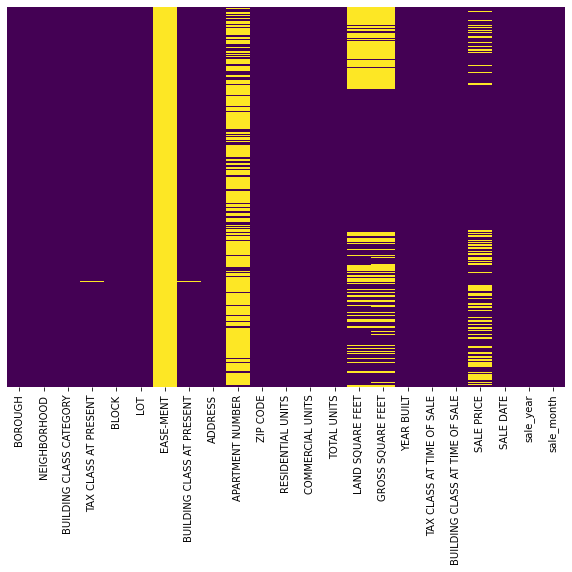

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This heat map shows us which columns have a lot of NAs. It looks like "Easement" and "Apartment Number" have a lot of NAs. We should take them out of the analysis. 

In [39]:
 #taking Easement and Apartment Number out of the data frame
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

"Land square feet" and "Gross square feet" also have a lot of NAs. Here let's just take out all the NAs in the df. 

In [65]:
df=df.dropna() 

In [66]:
# finally check if there is any duplicated value:
sum(df.duplicated())

348

Lets see if there are any other issues we need to fix... 

In [43]:
temp = df.copy()
for cols in temp.columns:
    temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47892 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47892 non-null  int64  
 1   NEIGHBORHOOD                    0 non-null      float64
 2   BUILDING CLASS CATEGORY         0 non-null      float64
 3   TAX CLASS AT PRESENT            42692 non-null  float64
 4   BLOCK                           47892 non-null  int64  
 5   LOT                             47892 non-null  int64  
 6   BUILDING CLASS AT PRESENT       0 non-null      float64
 7   ADDRESS                         0 non-null      float64
 8   ZIP CODE                        47892 non-null  int64  
 9   RESIDENTIAL UNITS               47892 non-null  int64  
 10  COMMERCIAL UNITS                47892 non-null  int64  
 11  TOTAL UNITS                     47892 non-null  int64  
 12  LAND SQUARE FEET                

In [44]:
temp.describe().T #this transposes the dataframe and essentially gives us imformation similar to summary statistics

,count,mean,std,min,25%,50%,75%,max
BOROUGH,47892.0,3.253591e+00,9.061898e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
NEIGHBORHOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,42692.0,1.432727e+00,8.577026e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
BLOCK,47892.0,4.983738e+03,3.429689e+03,1.000000e+00,2.188000e+03,4.660000e+03,6.973000e+03,1.631900e+04
LOT,47892.0,2.274456e+02,4.911709e+02,1.000000e+00,2.100000e+01,4.400000e+01,9.000000e+01,9.009000e+03
BUILDING CLASS AT PRESENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,47892.0,1.098587e+04,8.013073e+02,0.000000e+00,1.046900e+04,1.121700e+04,1.123800e+04,1.169400e+04
RESIDENTIAL UNITS,47892.0,2.585400e+00,1.752816e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.844000e+03


Looking at the summary statistics helps us understand the data better and what issues might need to be addressed. 

This table gave us interesting information! Apparently the minimum value for **sale price, year built and total units** is 0. This doesn't make any sence... Let's dive a little deeper into these features. 

### Sales Price

Lets look at how much of the data for sales price falls below 10,000 and above 10,000,000. We will want to take housing prices that fall above or below this threshold out of the data set, because logically, these aren't typical housing prices, so there might be something wrong with those entries. 

In [45]:
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.2464085859851332

25% of the sale prices are either less than 10,000 or greater than $10,000,000. We have to drop all these observations from the data

Let's look at this data that is under 10,000 a little closer, and see if we can visualize how these entries compare to the rest of the data set. 

In [46]:
# here we are adding the entries above 1000000 and below 10000 to a new dataframe called df2
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    3.602900e+04
mean     8.766271e+05
std      1.033039e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.090000e+05
75%      9.400000e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

<Figure size 864x432 with 0 Axes>

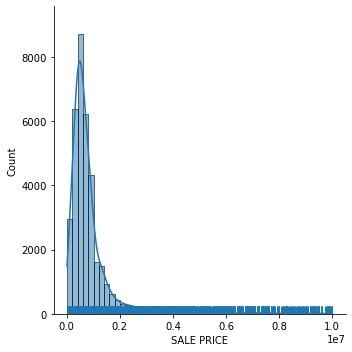

In [48]:
# now we plot a histogram of df2 as well as a chart that shows what the distribution of the entire data frame
plt.figure(figsize=(12,6))
sns.displot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

Now lets look at a histogram of the sales prices that are below 4000000. 

<Figure size 864x432 with 0 Axes>

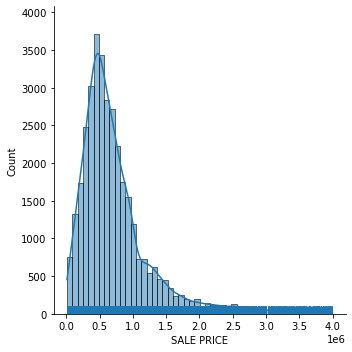

In [49]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.displot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

### Year Built

In the table above, the minimum value for year built was 0. Lets see how many of those cases we have. 

In [50]:
df2[df2['YEAR BUILT']==0]['YEAR BUILT'].count()

1435

It looks like there are 1435 instances where the year build is recorded as 0. 

Let's create a dataframe (df3) that doesn't include the entries for Year Built that have a zero. Then will look at a histogram of the dataset and see what we think. 

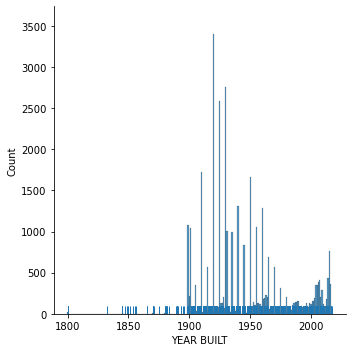

In [52]:
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.displot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()

### Total Units

Again, let's look at the total number of entries where Total Units is 0. 

In [53]:
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()

3427

Again, we will create a new df (called df4) that doesn't include the entries where year built was equal to 0. We will again show a histogram of total units using this new data frame. 

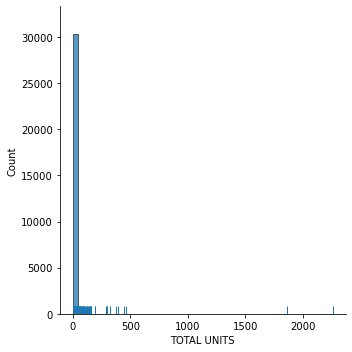

In [55]:
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.displot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()


Now lets look at the summary statistics for our new dataset df4. 

In [56]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,30338.0,5410.074890,3754.605894,1.0,2388.25,4831.0,7664.75,16319.0
LOT,30338.0,185.359813,384.097751,1.0,22.00,44.0,83.00,3597.0
RESIDENTIAL UNITS,30338.0,1.978410,12.675841,0.0,1.00,1.0,2.00,1844.0
COMMERCIAL UNITS,30338.0,0.176017,13.013086,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,30338.0,2.158646,18.246332,1.0,1.00,1.0,2.00,2261.0
LAND SQUARE FEET,30338.0,3239.574857,29534.169416,0.0,1820.00,2422.5,3500.00,4228300.0
GROSS SQUARE FEET,30338.0,2609.413772,24276.549541,0.0,1210.00,1680.0,2394.00,3750565.0
SALE PRICE,30338.0,792341.019415,594695.839673,10001.0,435000.00,630000.0,940000.00,3995000.0


After all that cleansing, lets look at the info for df4. 

In [57]:
df4.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30338 entries, 3 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30338 non-null  category      
 1   NEIGHBORHOOD                    30338 non-null  category      
 2   BUILDING CLASS CATEGORY         30338 non-null  category      
 3   TAX CLASS AT PRESENT            30338 non-null  category      
 4   BLOCK                           30338 non-null  int64         
 5   LOT                             30338 non-null  int64         
 6   BUILDING CLASS AT PRESENT       30338 non-null  category      
 7   ADDRESS                         30338 non-null  object        
 8   ZIP CODE                        30338 non-null  category      
 9   RESIDENTIAL UNITS               30338 non-null  int64         
 10  COMMERCIAL UNITS                30338 non-null  int64         
 11  TO

Looking at this table, we shouldn't need block, lot and address for our analysis, so we should take them out.

In [58]:
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)


Now lets add some lables to the categorical variable Borough, so we know what area we are talking about. 

In [59]:
#'1':'Manhattan', '2':'Bronx', '3': 'Brooklyn', '4':'Queens','5':'Staten Island'
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


Now we can look at how the sales prices compare accross the different boroughs. 

In [60]:
# some other visualizations: 
df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar


,BOROUGH,SALE PRICE
0,Staten Island,5.260213e+05
1,Bronx,5.579480e+05
2,Queens,7.074790e+05
3,Brooklyn,1.038700e+06
4,Manhattan,1.650300e+06


Let's plot these numbers in a bar graph, because visualizations helps us understand how values relate to eachother better. 

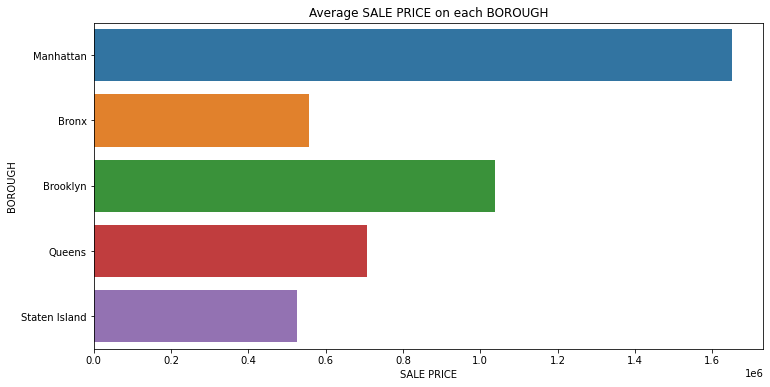

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_bar )
plt.title('Average SALE PRICE on each BOROUGH')
plt.show()


Here is a box plot and wisker for the different boroughs. 

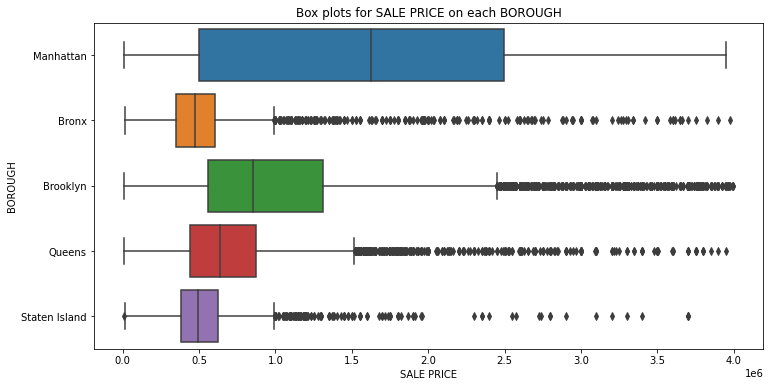

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df4 )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

We can see that Manhattan has the highest mean. 

Now lets see how sales compare when we look at the months. 

In [63]:
df_bar=df4[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,sale_month,Sales_count
0,1,2440
1,2,2329
2,3,2787
3,4,2350
4,5,2571
5,6,2940
6,7,2330
7,8,1942
8,9,2852
9,10,2377


Again, lets visualize this table with a bar graph to understand the numbers better. 

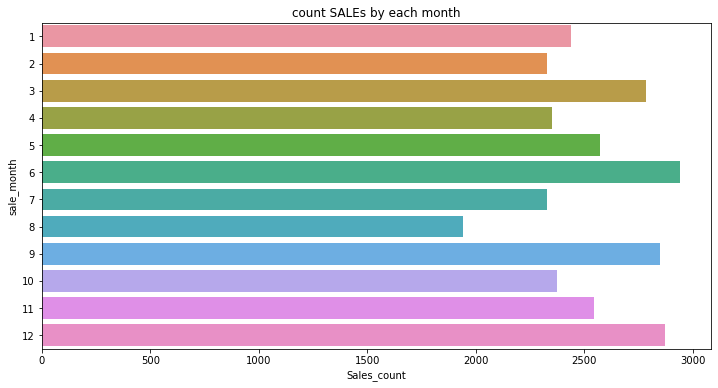

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'sale_month', x = 'Sales_count', data = df_bar )
plt.title('count SALEs by each month')
plt.show()

Thoughts: 
After going through this HW, I'm convinced that I couldn't have done this project without the answer key. I was relatively confident towards the beginning, and followed with the code that we used on the wage data set in class. It is interesting to me to see how different every EDA will be, because ever dataset will be very different.

By going thorugh the data, and trying to understand what the code was doing and why, I think I started to understand better how EDA works, and why it is important. 

In [68]:
!jupyter nbconvert --to html HW2.ipynb



[NbConvertApp] Converting notebook HW2.ipynb to html
[NbConvertApp] Writing 792188 bytes to HW2.html
